In [1]:
import numpy as np
import pandas as pd

np.random.seed(11)
size = 60
df = pd.DataFrame({
    'Sales_wout_ad': np.random.normal(loc=27, scale=5, size=size),
    'Sales_with_ad': np.random.normal(loc=31, scale=10, size=size)
})
df['Diff'] = df['Sales_with_ad'] - df['Sales_wout_ad']
df.describe()


,Sales_wout_ad,Sales_with_ad,Diff
count,60.000000,60.000000,60.000000
mean,26.966991,31.884004,4.917012
std,4.415282,10.658547,12.017531
min,13.733407,10.509427,-21.929127
25%,24.504857,24.167776,-2.944220
50%,27.138468,31.717059,5.479667
75%,30.037982,39.373996,12.046083
max,35.747274,53.018563,34.439118


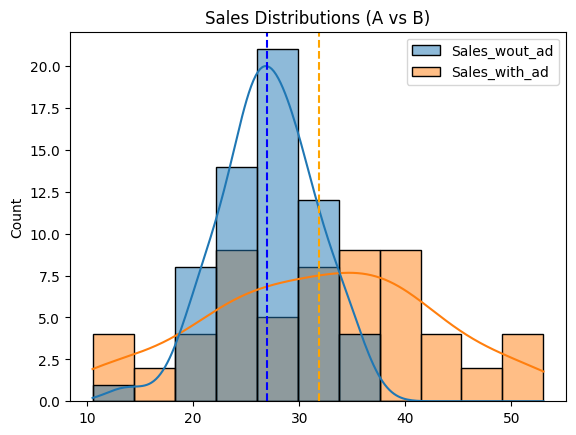

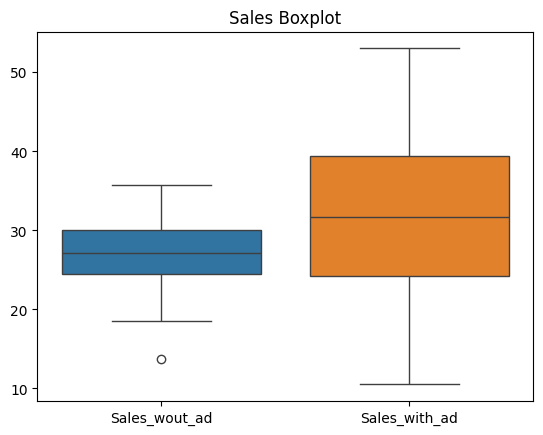

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data=df[['Sales_wout_ad', 'Sales_with_ad']], kde=True)
plt.axvline(df['Sales_wout_ad'].mean(), color='blue', linestyle='--')
plt.axvline(df['Sales_with_ad'].mean(), color='orange', linestyle='--')
plt.title("Sales Distributions (A vs B)")
plt.show()

sns.boxplot(data=df[['Sales_wout_ad', 'Sales_with_ad']])
plt.title("Sales Boxplot")
plt.show()


In [3]:
from scipy.stats import ttest_1samp

# One-sided test: Is the mean difference > 0?
result = ttest_1samp(df['Diff'], popmean=0)
print("t-stat:", result.statistic)
print("p-value (two-sided):", result.pvalue)


t-stat: 3.16928770270386
p-value (two-sided): 0.002422434945092005


In [4]:
p_one_sided = result.pvalue / 2
print("p-value (one-sided):", p_one_sided)


p-value (one-sided): 0.0012112174725460024


4. Interpretation
If p_one_sided < 0.05, the improvement is statistically significant.

Then tie it back to business:

If mean sales difference = 4.92 toys/day

Toy price = $10

Revenue gain = ~$1476/month

Ad cost = $1500 → Net = –$24/month

Then ask:

Should they run it anyway?

How do brand awareness, long-term loyalty, and repeat sales factor in?

